In [1]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from Analysis.helpers import load_from_path, save_image, update_mvar_dict

In [2]:
# from mobo.surrogate_model import BoTorchSurrogateModelReapeat, BoTorchSurrogateModel
import pandas as pd
from pathlib import Path
import numpy as np
import yaml

In [3]:
algos = ["qnehvi", "raqnehvi", "raqneirs"]
# algos = ["qnehvi", "raqnehvi"]
subfolder = "R10"
frmt = "pdf"
problem ="bstvert"

In [4]:
# Parameters
algos = ["qnehvi", "raqnehvi", "raqneirs"]
subfolder = "R10"
problem = "bstdiag"
seed = 0
frmt = "pdf"


In [5]:
path_dict = {}
for algo in algos:
    path_dict[algo] = list(Path(f"../result/{problem}/{subfolder}/{algo}/").glob("*"))
print(path_dict)

{'qnehvi': [WindowsPath('../result/bstdiag/R10/qnehvi/0'), WindowsPath('../result/bstdiag/R10/qnehvi/1'), WindowsPath('../result/bstdiag/R10/qnehvi/10'), WindowsPath('../result/bstdiag/R10/qnehvi/11'), WindowsPath('../result/bstdiag/R10/qnehvi/12'), WindowsPath('../result/bstdiag/R10/qnehvi/13'), WindowsPath('../result/bstdiag/R10/qnehvi/14'), WindowsPath('../result/bstdiag/R10/qnehvi/15'), WindowsPath('../result/bstdiag/R10/qnehvi/16'), WindowsPath('../result/bstdiag/R10/qnehvi/17'), WindowsPath('../result/bstdiag/R10/qnehvi/18'), WindowsPath('../result/bstdiag/R10/qnehvi/19'), WindowsPath('../result/bstdiag/R10/qnehvi/2'), WindowsPath('../result/bstdiag/R10/qnehvi/3'), WindowsPath('../result/bstdiag/R10/qnehvi/4'), WindowsPath('../result/bstdiag/R10/qnehvi/5'), WindowsPath('../result/bstdiag/R10/qnehvi/6'), WindowsPath('../result/bstdiag/R10/qnehvi/7'), WindowsPath('../result/bstdiag/R10/qnehvi/8'), WindowsPath('../result/bstdiag/R10/qnehvi/9')], 'raqnehvi': [WindowsPath('../result/b

In [6]:

path = list(path_dict.values())[0][0]

res_dict = load_from_path(path)
eval_sample = res_dict["eval_samples"]
batch_size = res_dict["batch_size"]
init_samples = res_dict["init_samples"]

index = eval_sample.index + 1

mvar_dict = {}

for algo, path_list in path_dict.items():
        
    #load all evaluated samples from path_list and create one big dataframe with columnnames appended with ___i
    eval_samples = pd.concat([load_from_path(path)["eval_samples"] for path in path_list], keys=range(len(path_list)), names=["seed"])
    refs = [load_from_path(path)["args"]["general"]["ref_point"] for path in path_list]
    eval_samples = eval_samples.reset_index()

    #check if all same length
    if len(eval_samples.groupby("seed").size().unique()) != 1:
        raise ValueError("Not all seeds have the same number of iterations")

    mvar_dict[algo] = {
        "raw": eval_samples,
        "refs": refs,
    }

#calc hypervolume difference
mvar_dict = update_mvar_dict(mvar_dict, path)

SMOKE_TEST None


     seed  level_1  iterID    x1    x2    f1  rho_f1  mvar_f1    f2  rho_f2  \
0    True     True    True  True  True  True    True     True  True    True   
1    True     True    True  True  True  True    True     True  True    True   
2    True     True    True  True  True  True    True     True  True    True   
3    True     True    True  True  True  True    True     True  True    True   
4    True     True    True  True  True  True    True     True  True    True   
..    ...      ...     ...   ...   ...   ...     ...      ...   ...     ...   
715  True     True    True  True  True  True    True     True  True    True   
716  True     True    True  True  True  True    True     True  True    True   
717  True     True    True  True  True  True    True     True  True    True   
718  True     True    True  True  True  True    True     True  True    True   
719  True     True    True  True  True  True    True     True  True    True   

     mvar_f2  Expected_f1  Uncertainty_f1  Acquisit

     seed  level_1  iterID    x1    x2    f1  rho_f1  mvar_f1    f2  rho_f2  \
0    True     True    True  True  True  True    True     True  True    True   
1    True     True    True  True  True  True    True     True  True    True   
2    True     True    True  True  True  True    True     True  True    True   
3    True     True    True  True  True  True    True     True  True    True   
4    True     True    True  True  True  True    True     True  True    True   
..    ...      ...     ...   ...   ...   ...     ...      ...   ...     ...   
715  True     True    True  True  True  True    True     True  True    True   
716  True     True    True  True  True  True    True     True  True    True   
717  True     True    True  True  True  True    True     True  True    True   
718  True     True    True  True  True  True    True     True  True    True   
719  True     True    True  True  True  True    True     True  True    True   

     mvar_f2  Expected_f1  Uncertainty_f1  Acquisit

     seed  level_1  iterID    x1    x2    f1  rho_f1  mvar_f1    f2  rho_f2  \
0    True     True    True  True  True  True    True     True  True    True   
1    True     True    True  True  True  True    True     True  True    True   
2    True     True    True  True  True  True    True     True  True    True   
3    True     True    True  True  True  True    True     True  True    True   
4    True     True    True  True  True  True    True     True  True    True   
..    ...      ...     ...   ...   ...   ...     ...      ...   ...     ...   
715  True     True    True  True  True  True    True     True  True    True   
716  True     True    True  True  True  True    True     True  True    True   
717  True     True    True  True  True  True    True     True  True    True   
718  True     True    True  True  True  True    True     True  True    True   
719  True     True    True  True  True  True    True     True  True    True   

     mvar_f2  Expected_f1  Uncertainty_f1  Acquisit

In [7]:
# from botorch.utils.multi_objective.hypervolume import infer_reference_point
# import torch

# ref_point_ideal = (-infer_reference_point(torch.tensor(-opt_mvar_pf)).numpy()).tolist()
# ref_point_ideal
# refs = [ref_point_ideal for _ in refs]
# for algo, data in mvar_dict.items():
#     mvar_dict[algo]["refs"] = refs

In [8]:
mvar_dict[algo]["raw"]
algo = algos[0]
# seed	level_1	iterID	x1	x2	f1	rho_f1	mvar_f1	f2	rho_f2	mvar_f2	Expected_f1	Uncertainty_f1	Acquisition_f1	Expected_f2	Uncertainty_f2	Acquisition_f2	Hypervolume_indicator	MVaR_Hypervolume_indicator	MVaR Diff.

# get MVAR HV of all seeds in final iteration
mvar_dict[algo]["raw"].loc[mvar_dict[algo]["raw"]["iterID"] == mvar_dict[algo]["raw"]["iterID"].max(), ["seed", "MVaR_Hypervolume_indicator"]].set_index("seed")

,MVaR_Hypervolume_indicator
seed,
0,0.160526
1,0.125791
2,0.165801
3,0.145331
4,0.179350
5,0.196940
6,0.093377
7,0.201284
8,0.169604


WindowsPath("Plots_new/bstdiag/R10/mvar_hv_comparison_dict_keys(['qnehvi', 'raqnehvi', 'raqneirs']).pdf")

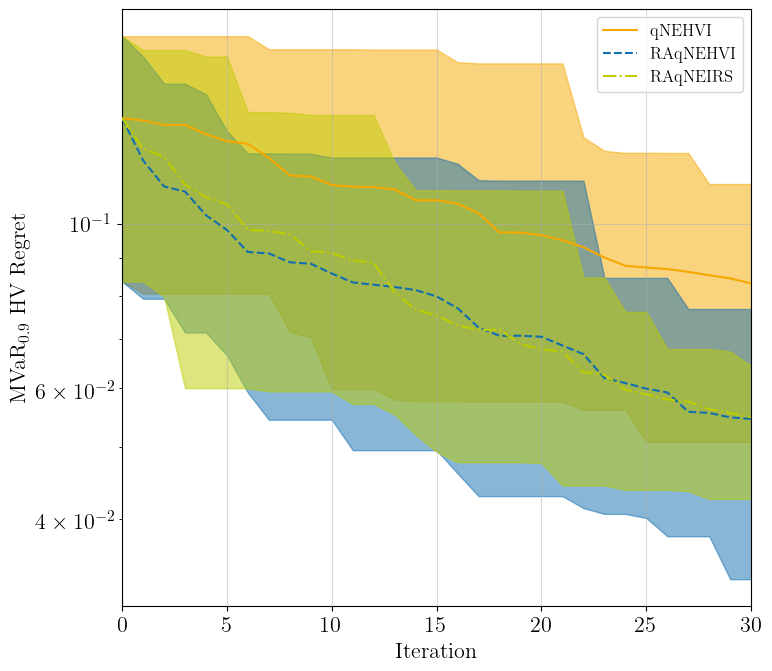

In [9]:
# %config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 16,
})
colors = defaultColors
# orange
colors[0] = "#f6a800"
# blue
colors[1] = "#116eaf"

batch_dots = eval_sample["iterID"]*batch_size +init_samples

labels_dict = {
    "qnehvi": "qNEHVI",
    "raqnehvi": "RAqNEHVI",
    "raqneirs": "RAqNEIRS",
}

fig, ax = plt.subplots(figsize=(8,7))

line_styles = ["-", "--", "-."]

for j, (algo, data) in enumerate(mvar_dict.items()):
    eval_samples = data["raw"]
    eval_samples_mean = eval_samples.groupby("iterID").transform("mean").iloc[eval_sample.index]
    eval_samples_std = eval_samples.groupby("iterID").transform("std").iloc[eval_sample.index]
    mean = eval_samples.groupby("iterID")["MVaR Diff."].mean()
    std = eval_samples.groupby("iterID")["MVaR Diff."].std()
    lower = eval_samples.groupby("iterID")["MVaR Diff."].quantile(0.1)
    upper = eval_samples.groupby("iterID")["MVaR Diff."].quantile(0.9)
    # upper = mean + std
    # lower = np.maximum(mean - std, 0)
    
    ax.fill_between(eval_sample["iterID"].unique(), lower, upper, alpha=0.5, color=colors[j])
    ax.plot(eval_sample["iterID"].unique(), mean, label=labels_dict[algo], color=colors[j], linestyle=line_styles[j], zorder=3)
    # ax.plot(eval_sample["iterID"], mean, color="black", linestyle=line_styles[j], zorder=2, linewidth=1.5)


# log scale
ax.set_yscale("log")

ax.set_xlabel("Iteration")
ax.set_ylabel("$\\textrm{MVaR}_{0.9}$ HV Regret")
ax.set_xlim(0, eval_samples["iterID"].max())
# ax.set_ylim(0, 0.201)

if len(algos) > 2:
    ax.legend(fontsize=12, loc="upper right")

# grid
ax.grid(True, linestyle="-", alpha=0.5)

fig.tight_layout()

save_image(fig, path, f"mvar_hv_comparison", f"{path_dict.keys()}", frmt, bbox_inches='tight')



iter: 1
algo: qnehvi, score: 0.15
algo: raqnehvi, score: 0.44999999999999996
algo: raqneirs, score: 0.39999999999999997
Sum: 1.0
iter: 2
algo: qnehvi, score: 0.15
algo: raqnehvi, score: 0.55
algo: raqneirs, score: 0.3
Sum: 1.0
iter: 3
algo: qnehvi, score: 0.09999999999999999
algo: raqnehvi, score: 0.5
algo: raqneirs, score: 0.39999999999999997
Sum: 1.0
iter: 4
algo: qnehvi, score: 0.08333333333333333
algo: raqnehvi, score: 0.5833333333333334
algo: raqneirs, score: 0.3333333333333333
Sum: 1.0
iter: 5
algo: qnehvi, score: 0.016666666666666666
algo: raqnehvi, score: 0.5166666666666666
algo: raqneirs, score: 0.4666666666666667
Sum: 1.0
iter: 6
algo: qnehvi, score: 0.016666666666666666
algo: raqnehvi, score: 0.4666666666666667
algo: raqneirs, score: 0.5166666666666666
Sum: 1.0
iter: 7
algo: qnehvi, score: 0.016666666666666666
algo: raqnehvi, score: 0.4666666666666667
algo: raqneirs, score: 0.5166666666666666
Sum: 1.0
iter: 8
algo: qnehvi, score: 0.06666666666666667
algo: raqnehvi, score: 0.

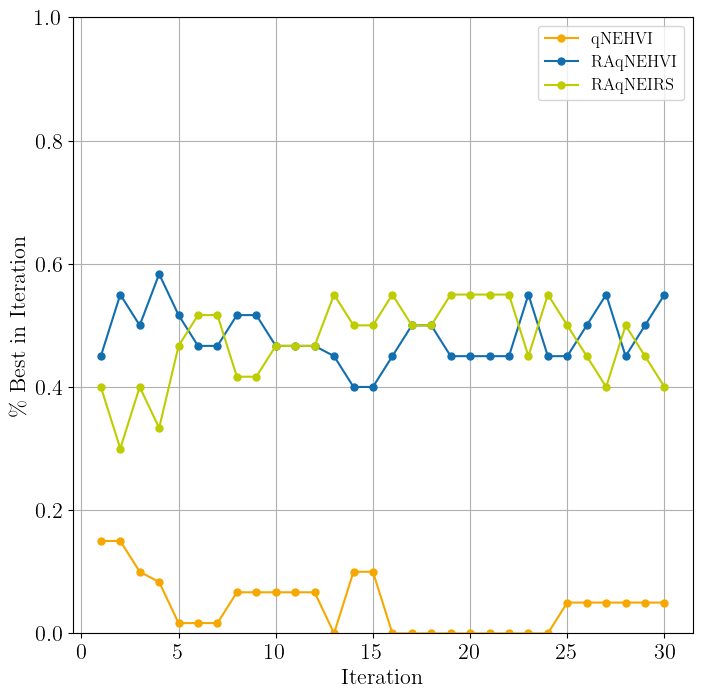

WindowsPath("Plots_new/bstdiag/R10/avg_rank_dict_keys(['qnehvi', 'raqnehvi', 'raqneirs']).pdf")

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mvar_dict' has your data and 'colors' is an array of colors for each algorithm.
num_algorithms = len(mvar_dict)  # Number of different algorithms
iterations = list(mvar_dict["qnehvi"]["raw"]["iterID"].unique())
iterations.pop(0)  # Remove the first iteration (since it's usually the initialization)
n_seeds = len(mvar_dict["qnehvi"]["raw"]["seed"].unique())

# Calculate average rank for each algorithm at each iteration
ranks = {algo: [] for algo in mvar_dict}
ranks_mean = {algo: [] for algo in mvar_dict}

for iter in iterations:
    # Collect the MVaR Hypervolume indicator for each algorithm at this iteration
    performance = {}
    perf_array = np.zeros((len(mvar_dict.keys()), n_seeds))
    
    for i, (algo, data) in enumerate(mvar_dict.items()):
        samples = data["raw"]
        hvs = samples[samples["iterID"] == iter]["MVaR Diff."]
        performance[algo] = np.mean(hvs) if len(hvs) > 0 else float('inf')  # Handle case where hvs might be empty
        perf_array[i] = hvs.values
        
    rank_iter_i = np.argsort(perf_array, axis=0) +1
    rank_iter_i_mean = np.mean(rank_iter_i, axis=1)
    
    perf_orig = perf_array
    scores = np.zeros(len(mvar_dict))
    index_arr = np.arange(len(mvar_dict))
    for i, algo in enumerate(mvar_dict):
        rolled_perf = np.roll(perf_orig, i, axis=0)
        rolled_index = np.roll(index_arr, i)
        argmins = np.argmin(rolled_perf, keepdims=True, axis=0)
        for j, _ in enumerate(mvar_dict):
            scores[rolled_index[j]] += (argmins == j).sum() / n_seeds / len(mvar_dict)
    
    print(f"iter: {iter}")
    for i, algo in enumerate(mvar_dict):
        score = scores[i]
        print(f"algo: {algo}, score: {score}")
        ranks_mean[algo].append(score)
    print(f"Sum: {scores.sum()}")
        
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the average ranks for each algorithm
# for i, (algo, algo_ranks) in enumerate(ranks.items()):
#     ax.plot(iterations, algo_ranks, color=colors[i], marker="o", linestyle="-", markersize=5, label=labels_dict[algo])
    
for i, (algo, algo_ranks) in enumerate(ranks_mean.items()):
    ax.plot(iterations, algo_ranks, color=colors[i], marker="o", linestyle="-", markersize=5, label=labels_dict[algo])


# Customize the plot
ax.set_ylim(0, 1)
ax.set_xlabel('Iteration')
ax.set_ylabel('\% Best in Iteration')
# ax.set_title('Average Rank per Algorithm over Iterations')
ax.grid(True)

#invert y-axis to have the best algorithm on top
ax.legend(fontsize=12, loc="upper right")
# Show the plot
plt.show()
save_image(fig, path, f"avg_rank", f"{path_dict.keys()}", frmt, bbox_inches='tight')


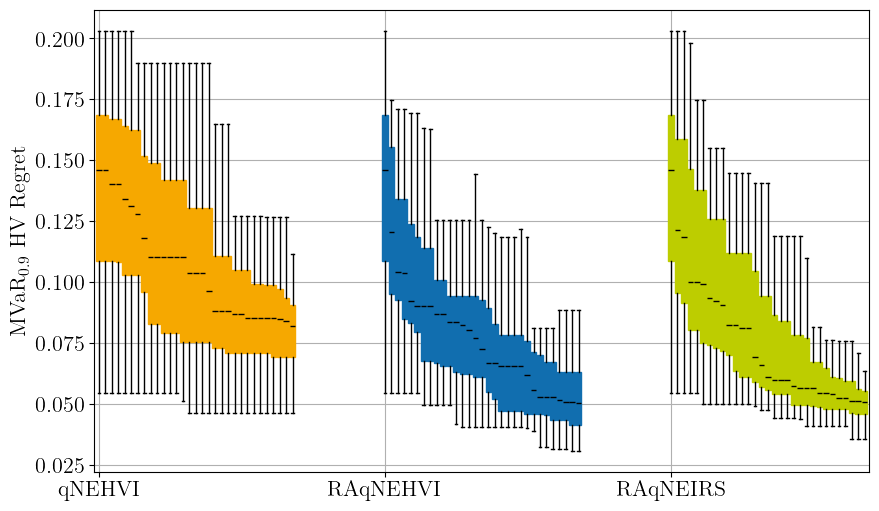

WindowsPath("Plots_new/bstdiag/R10/boxplot_evolution_comp_dict_keys(['qnehvi', 'raqnehvi', 'raqneirs']).pdf")

In [11]:
import matplotlib.pyplot as plt

# Assuming 'mvar_dict' has your data and 'colors' is an array of colors for each algorithm.
num_algorithms = len(mvar_dict)  # Number of different algorithms
width = 0.6  # Width of each boxplot
spacing = 0.1  # Space between each boxplot

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each algorithm and its corresponding data
for i, (algo, data) in enumerate(mvar_dict.items()):
    samples = data["raw"]
    mean = samples.groupby("iterID")["MVaR Diff."].mean()
    
    # Calculate the positions for the boxplots of this algorithm
    positions = [len(mean)*i + j*(width + spacing) for j in range(len(mean))]
    
    # Plot boxplots for each iteration
    for iter, pos in enumerate(positions):
        hvs = samples[samples["iterID"] == iter]["MVaR Diff."]
        ax.boxplot(hvs, positions=[pos], showfliers=False, widths=width, patch_artist=True,
                   boxprops=dict(facecolor=colors[i], color=colors[i]),
                   medianprops=dict(color="black"))

# Set the x-axis labels and title
ax.set_xticks([i*(len(mean)) for i in range(num_algorithms)])
ax.set_xticklabels(map(lambda x: labels_dict[x], mvar_dict.keys()))
# ax.set_title('MVaR Hypervolume Indicator per Algorithm')
ax.set_ylabel("$\\textrm{MVaR}_{0.9}$ HV Regret")
ax.grid(True)
# Show the plot
plt.show()

save_image(fig, path, f"boxplot_evolution_comp", f"{path_dict.keys()}", frmt, bbox_inches='tight')

\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Iteration & qNEHVI & RAqNEHVI & RAqNEIRS \\
\hline
0 & $138.80 \pm 39.41$ & $138.80 \pm 39.41$ & $138.80 \pm 39.41$ \\
3 & $135.87 \pm 40.23$ & $110.49 \pm 33.21$ & $112.92 \pm 42.22$ \\
6 & $128.14 \pm 38.56$ & $91.58 \pm 28.50$ & $98.08 \pm 32.07$ \\
9 & $115.78 \pm 40.58$ & $88.30 \pm 28.28$ & $91.81 \pm 29.89$ \\
12 & $112.03 \pm 41.21$ & $82.73 \pm 27.99$ & $88.58 \pm 30.72$ \\
15 & $107.54 \pm 40.92$ & $79.78 \pm 27.81$ & $75.19 \pm 26.77$ \\
18 & $97.33 \pm 37.31$ & $70.60 \pm 27.48$ & $71.92 \pm 25.23$ \\
21 & $95.00 \pm 37.25$ & $68.49 \pm 25.15$ & $67.19 \pm 26.25$ \\
24 & $87.74 \pm 28.04$ & $60.95 \pm 22.42$ & $59.69 \pm 19.49$ \\
27 & $86.09 \pm 28.16$ & $55.75 \pm 19.28$ & $57.54 \pm 19.08$ \\
30 & $83.06 \pm 26.99$ & $54.53 \pm 19.32$ & $54.81 \pm 19.37$ \\
\hline
\end{tabular}
\caption{MVaR Hypervolume Difference Mean and Std Dev per Algorithm and Iteration in units of $10^{-3}$}
\label{tab:mvar_hv}
\end{tab

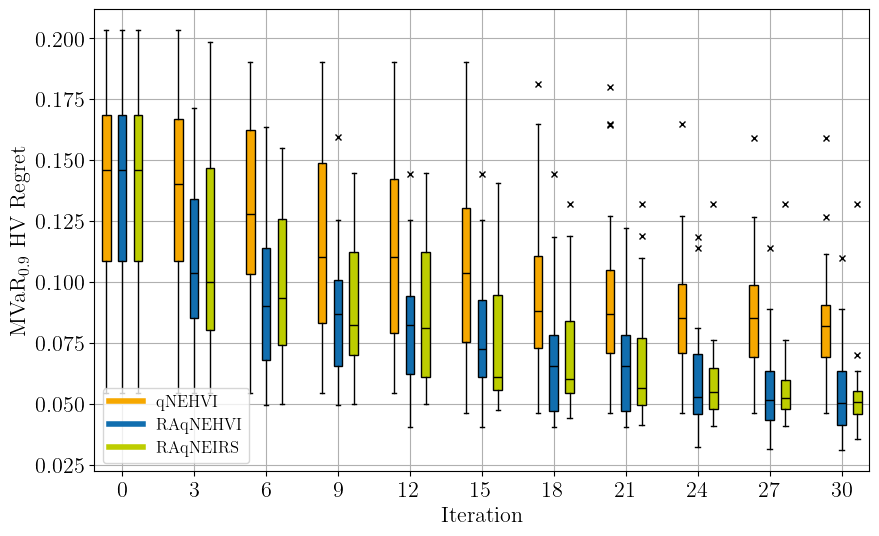

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'mvar_dict' has your data and 'colors' is an array of colors for each algorithm.
num_algorithms = len(mvar_dict)  # Number of different algorithms

every_nth = 3

width = 0.6/5*every_nth  # Width of each boxplot
spacing = 0.5/5*every_nth  # Space between each boxplot
tick_spacing = 0.5/5*every_nth  # Space between each tick

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

iterations = [every_nth * i for i in range(mvar_dict["qnehvi"]["raw"]["iterID"].max()//every_nth + 1)]

tick_labels = []
ticks = []

# Data for LaTeX table
latex_data = {}

# Iterate over each iteration
for iter in iterations:
    # Iterate over each algorithm and its corresponding data
    for i, (algo, data) in enumerate(mvar_dict.items()):
        samples = data["raw"]
        if iter < len(samples):
            hvs = samples[samples["iterID"] == iter]["MVaR Diff."]
            # Calculate position for this boxplot
            position = iter + (i * (width + spacing))
            ax.boxplot(
                hvs,
                positions=[position],
                showfliers=True,
                widths=width,
                patch_artist=True,
                boxprops=dict(facecolor=colors[i], color="black", linewidth=1),
                medianprops=dict(color="black"),
                flierprops=dict(
                    marker="x", markerfacecolor="black", markersize=5, linestyle="none"),
            )
            if i == 1:
                tick_labels.append(iter)
                ticks.append(position)

            # Calculate mean and standard deviation for LaTeX table
            mean_hvs = hvs.values.reshape(-1, batch_size).mean(axis=1).mean()
            std_hvs = hvs.values.reshape(-1, batch_size).mean(axis=1).std()
            
            # Populate the LaTeX data dictionary
            if iter not in latex_data:
                latex_data[iter] = {}
            latex_data[iter][algo] = (mean_hvs, std_hvs)

# Set the x-axis labels and title
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# Adjust x-axis
ax.set_xlabel("Iteration")
ax.set_ylabel("$\\textrm{MVaR}_{0.9}$ HV Regret")
# ax.set_title('MVaR Hypervolume Indicator per Algorithm and Iteration')
ax.grid(True)

#log scale
# ax.set_yscale("log")

# create legend handles
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[i], lw=4, label=labels_dict[algo]) for i, algo in enumerate(mvar_dict)]
ax.legend(handles=legend_elements, fontsize=12, loc="lower left")

save_image(fig, path, f"boxplot_mvar_hv_comp", f"{path_dict.keys()}", frmt, bbox_inches='tight')

# Generate LaTeX table
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|" + "c|" * num_algorithms + "}\n\\hline\n"
latex_table += "Iteration & " + " & ".join([labels_dict[algo] for algo in mvar_dict.keys()]) + " \\\\\n\\hline\n"

for iter, algo_data in latex_data.items():
    row = f"{iter} & "
    row += " & ".join([f"${mean*1000:.2f} \\pm {std*1000:.2f}$" for mean, std in algo_data.values()])
    row += " \\\\\n"
    latex_table += row

latex_table += "\\hline\n\\end{tabular}\n\\caption{MVaR Hypervolume Difference Mean and Std Dev per Algorithm and Iteration in units of $10^{-3}$}\n\\label{tab:mvar_hv}\n\\end{table}"

print(latex_table)